# ACF & PACF

## Overview

```python
p, d, q = 1, 1, 3  # Non-seasonal parameters
P, D, Q, s = 1, 0, 3, 12  # Seasonal parameters

order = (p, d, q)
seasonal_order = (P, D, Q, s)

model = SARIMAX(series, order=order, seasonal_order=seasonal_order)
```

In [3]:
from statsmodels.tsa.arima.model import ARIMA 
from statsmodels.tsa.statespace.sarimax import SARIMAX

<style>
    table.custom-table {
        max-width: 1000px;
        width: 100%;
        margin: 0 auto; /* centers the table on the page */
    }

    table.custom-table td {
        background-color: #fff;
    }
    
    table.custom-table th, table.custom-table td {
        text-align: center;
        vertical-align: middle;
        padding: 5px;
        width: 500px; /* distribute the total width equally among three columns */
    }

    table.custom-table img {
        width: 100%;
        display: block; /* removes any gap under the image */
    }
</style>

<table class="custom-table">
    <thead>
        <tr>
            <th>ARIMA Model Parameters</th>
            <th>SARIMA Model Parameters</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>
                <table>
                    <tr><th>Parameter</th><th>Abbreviation</th><th>Description</th><th>Correlation Plot Type</th></tr>
                    <tr><td>p</td><td>AR</td><td>Auto Regression Order</td><td>Partial Autocorrelation</td></tr>
                    <tr><td>d</td><td>-</td><td>Differencing Order</td><td>-</td></tr>
                    <tr><td>q</td><td>MA</td><td>Moving Average Order</td><td>Autocorrelation</td></tr>
                </table>
            </td>
            <td>
                <table>
                    <tr><th>Parameter</th><th>Abbreviation</th><th>Description</th><th>Correlation Plot Type</th></tr>
                    <tr><td>p</td><td>AR</td><td>Auto Regression Order</td><td>Partial Autocorrelation</td></tr>
                    <tr><td>d</td><td>-</td><td>Differencing Order</td><td>-</td></tr>
                    <tr><td>q</td><td>MA</td><td>Moving Average Order</td><td>Autocorrelation</td></tr>
                    <tr><td>P</td><td>SAR</td><td>Seasonal Auto Regression Order</td><td>Partial Autocorrelation</td></tr>
                    <tr><td>D</td><td>-</td><td>Seasonal Differencing Order</td><td>-</td></tr>
                    <tr><td>Q</td><td>SMA</td><td>Seasonal Moving Average Order</td><td>Autocorrelation</td></tr>
                    <tr><td>s</td><td>-</td><td>Seasonal Period (in time units)</td><td>-</td></tr>
                </table>
            </td>
        </tr>
    </tbody>
</table>

![](src/03_input.png)

In [7]:
import warnings 
warnings.filterwarnings('ignore')

## Data

In [8]:
import pandas as pd
import numpy as np
from datetime import timedelta
import matplotlib.pyplot as plt

pd.options.plotting.backend = 'plotly'

df_passengers = pd.read_csv('../data/airline-passengers.csv', parse_dates=["Month"], index_col="Month")
df_passengers = df_passengers.asfreq('MS')
series = df_passengers.Passengers
series

Month
1949-01-01    112
1949-02-01    118
             ... 
1960-11-01    390
1960-12-01    432
Freq: MS, Name: Passengers, Length: 144, dtype: int64

## Check Stationarity & Seasonality

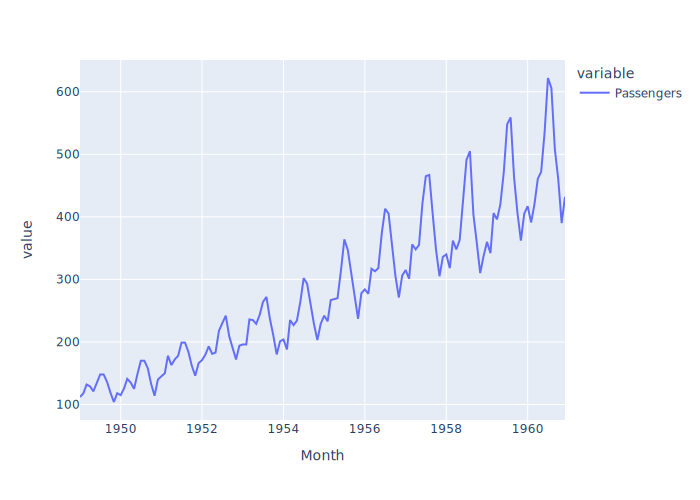

(0.8153688792060371,
 0.9918802434376408,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.692930839019)

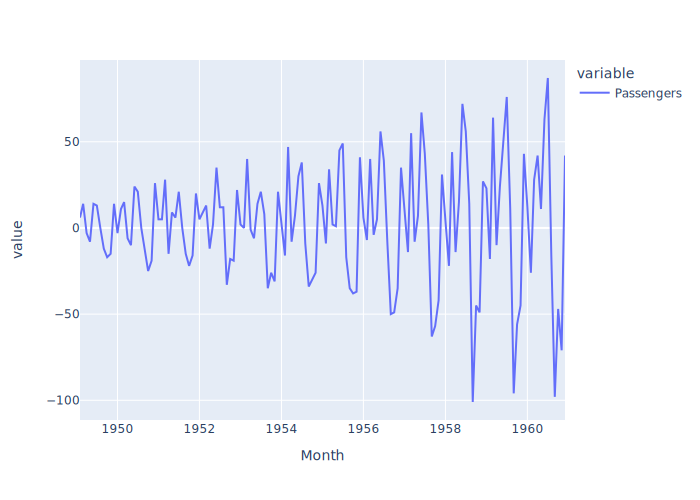

(-2.829266824169981,
 0.05421329028382792,
 12,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 988.5069317854085)

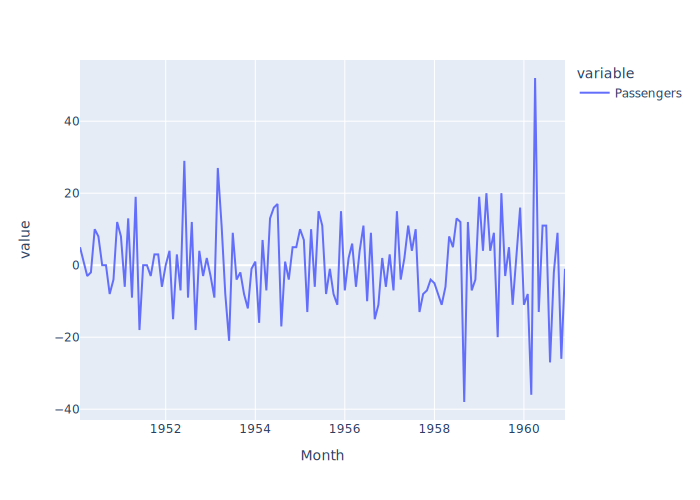

(-15.59561808374634,
 1.856511600123444e-28,
 0,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 919.8428088960275)

## ACF & PACF

### ARIMA (p,d,q)

| Parameter | Abbreviation   | Description              | Correlation Plot Type  |
|-----------|----------------|--------------------------|------------------------|
| p         | AR | Auto Regression Order    | Partial Autocorrelation|
| d         | -              | Differencing Order       | -                      |
| q         | MA | Moving Average Order     | Autocorrelation        |

#### Partial Autocorrelation Plot for `p`

##### Calculation

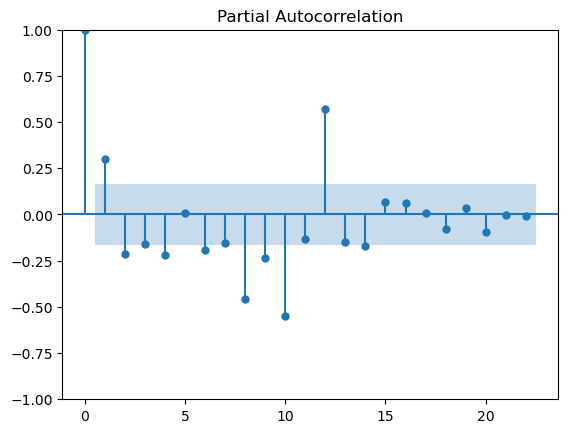

##### Model Application

```python
p = 2
d = 1 # differencing to make series stationary (ie, no trend)
q = ?

model = ARIMA(series, order=(p,d,q))
```

#### Autocorrelation Plot for `q`

##### Calculation

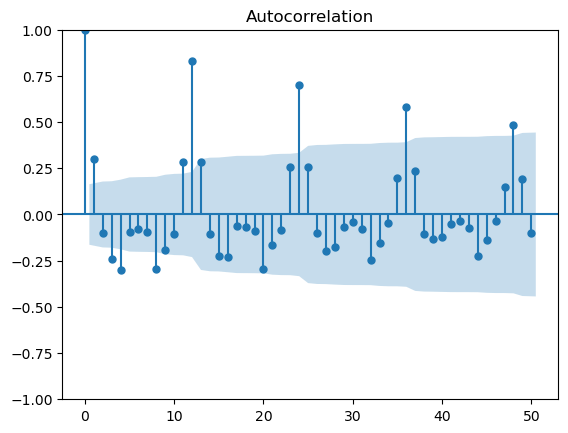

##### Model Application

#### Manual Tuning

##### Analize Forecast

1961-01-01    471.000383
1961-02-01    492.998177
                 ...    
1961-04-01    492.528738
1961-05-01    484.243730
Freq: MS, Name: predicted_mean, Length: 5, dtype: float64

Month
1960-08-01    606
1960-09-01    508
             ... 
1960-11-01    390
1960-12-01    432
Freq: MS, Name: Passengers, Length: 5, dtype: int64

,Passengers
Month,
1949-01-01,112
1949-02-01,118
...,...
1960-11-01,390
1960-12-01,432


,Passengers,"Forecast (2, 1, 1)"
1949-01-01,112.0,NaN
1949-02-01,118.0,NaN
...,...,...
1964-11-01,NaN,478.347161
1964-12-01,NaN,478.347163


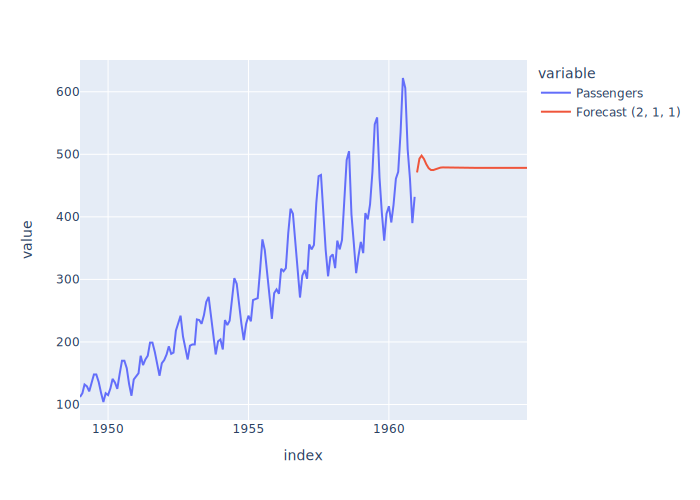

##### Compare with New Order

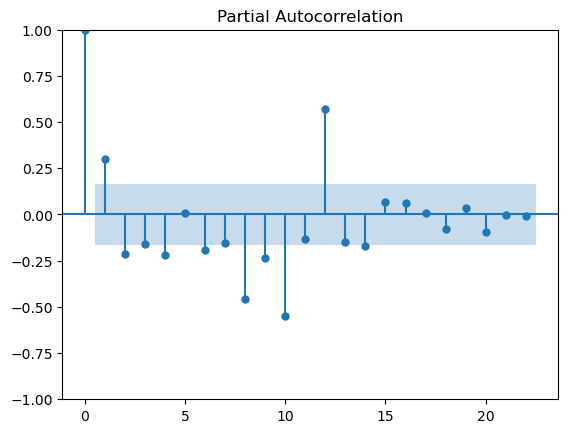

,Passengers,"Forecast (2, 1, 1)","Forecast (12, 1, 1)"
1949-01-01,112.0,NaN,NaN
1949-02-01,118.0,NaN,NaN
...,...,...,...
1964-11-01,NaN,478.347161,468.707699
1964-12-01,NaN,478.347163,492.063407


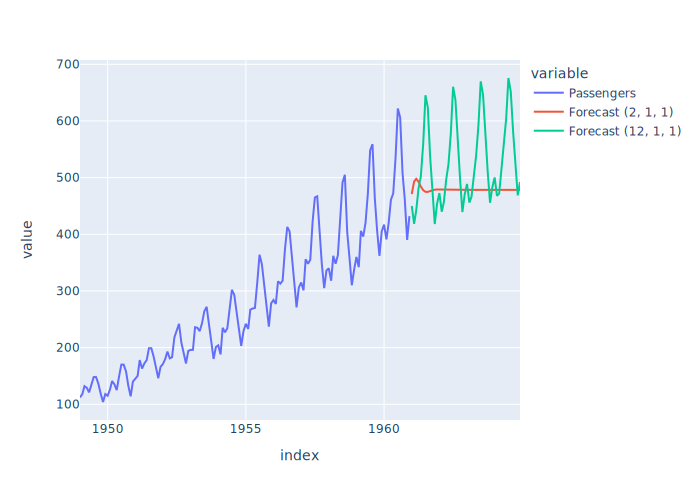

#### Comparing Different Numbers

##### `P` for Moving Average [MA] with ACF

- ARIMA (P,d,Q)
- ARIMA (MA,d,AR)
- ARIMA (ACF,d,PACF)

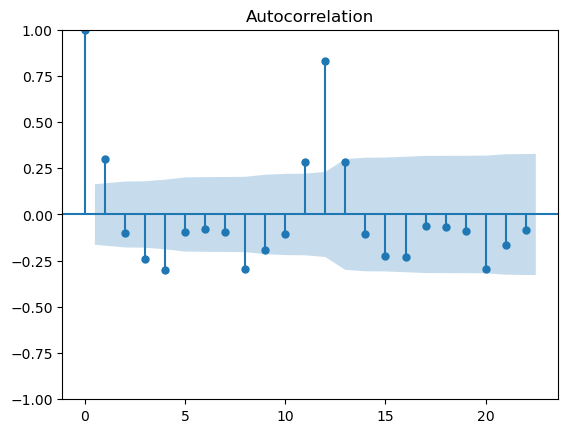

,Passengers,"Forecast (12, 1, 1)","Forecast (12, 1, 3)","Forecast (12, 1, 4)","Forecast (12, 1, 8)","Forecast (12, 1, 11)","Forecast (12, 1, 12)"
1949-01-01,112.0,NaN,NaN,NaN,NaN,NaN,NaN
1949-02-01,118.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
1964-11-01,NaN,468.707699,473.803094,486.160506,510.376329,499.391530,514.455876
1964-12-01,NaN,492.063407,493.889215,506.606537,531.744434,519.234826,539.032851


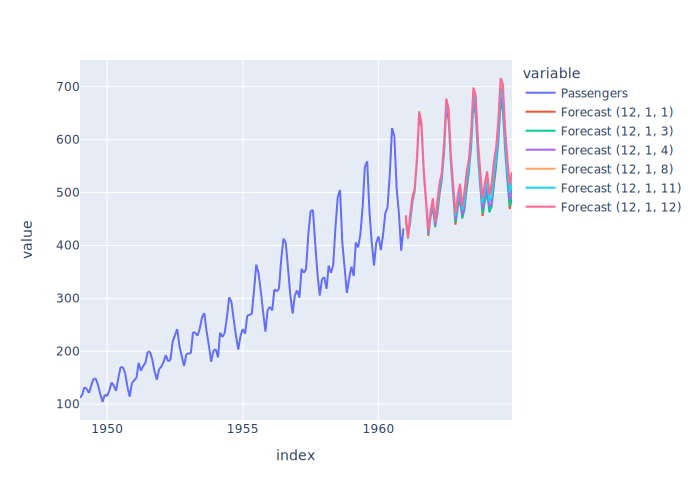

##### `Q` for Auto Regression [AR] with PACF

- ARIMA (P,d,Q)
- ARIMA (MA,d,AR)
- ARIMA (ACF,d,PACF)

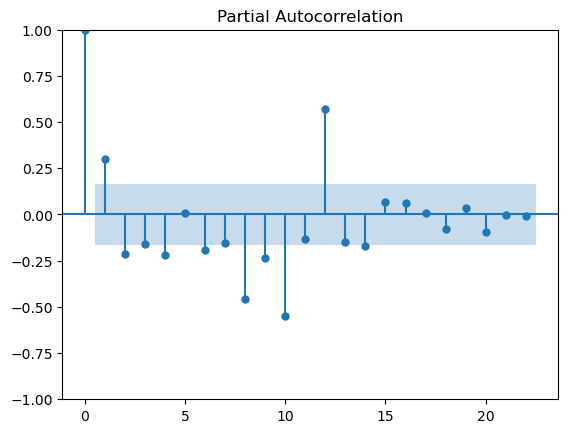

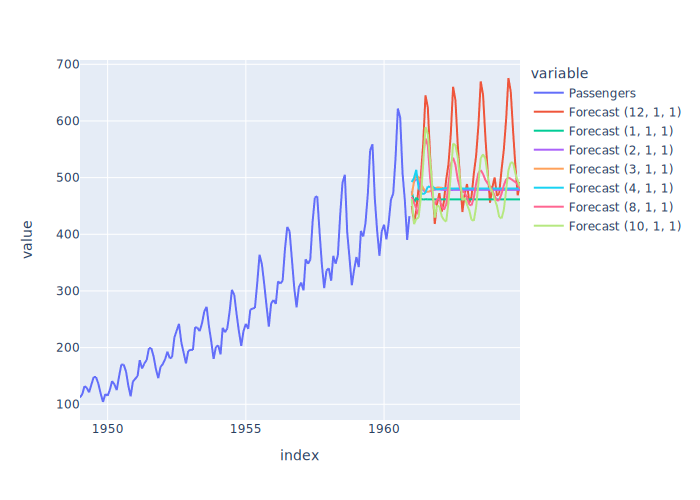

### SARIMA (P,D,Q,s)

| Parameter | Abbreviation   | Description                     | Correlation Plot Type  |
|-----------|----------------|---------------------------------|------------------------|
| p         | AR | Auto Regression Order           | Partial Autocorrelation|
| d         | -              | Differencing Order              | -                      |
| q         | MA | Moving Average Order            | Autocorrelation        |
| P         | SAR | Seasonal Auto Regression Order   | Partial Autocorrelation|
| D         | -              | Seasonal Differencing Order     | -                      |
| Q         | SMA | Seasonal Moving Average Order   | Autocorrelation        |
| s         | -              | Seasonal Period (in time units) | -                      |

#### Manual Configuration

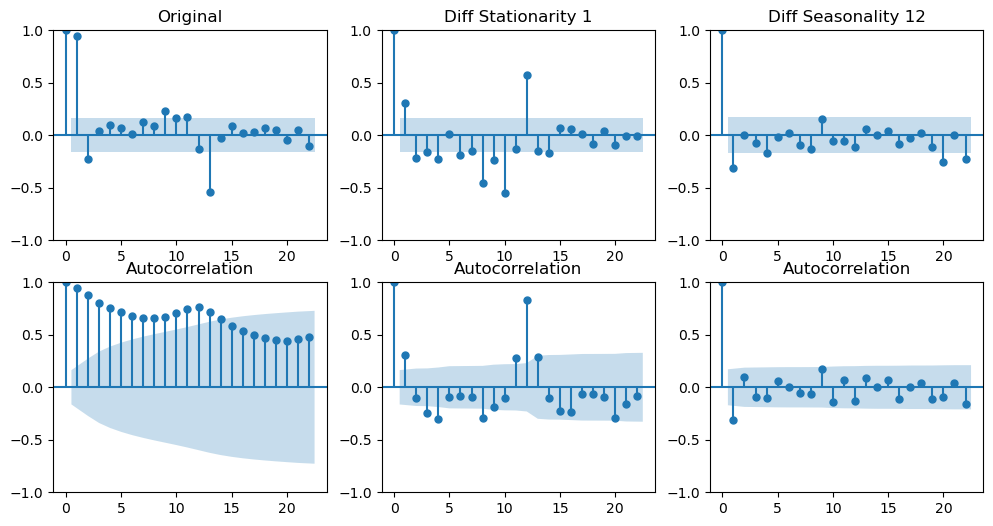

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                         Passengers   No. Observations:                  144
Model:             SARIMAX(2, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -503.124
Date:                            Thu, 30 May 2024   AIC                           1018.248
Time:                                    01:01:52   BIC                           1035.499
Sample:                                01-01-1949   HQIC                          1025.258
                                     - 12-01-1960                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5800      0.096      6.037      0.000       0.392       0.768
ar.L2          0.2287      0.103      2.211      0.027       0.026       0.432
ma.L1         -0.9783      0.043    -22.664      0.000      -1.063      -0.894
ar.S.L12      -0.9027      0.245     -3.690      0.000      -1.382      -0.423
ma.S.L12       0.8118      0.335      2.427      0.015       0.156       1.467
sigma2       124.4919     13.841      8.994      0.000      97.363     151.620
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                11.02
Prob(Q):                              0.93   Prob(JB):                         0.00
Heteroskedasticity (H):               2.60   Skew:                             0.14
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.39
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

,Passengers
Month,
1949-01-01,112
1949-02-01,118
...,...
1960-11-01,390
1960-12-01,432


,Passengers,"Forecast (2, 1, 1) (1, 1, 1, 12)"
1949-01-01,112.0,NaN
1949-02-01,118.0,NaN
...,...,...
1964-11-01,NaN,534.960046
1964-12-01,NaN,577.340591


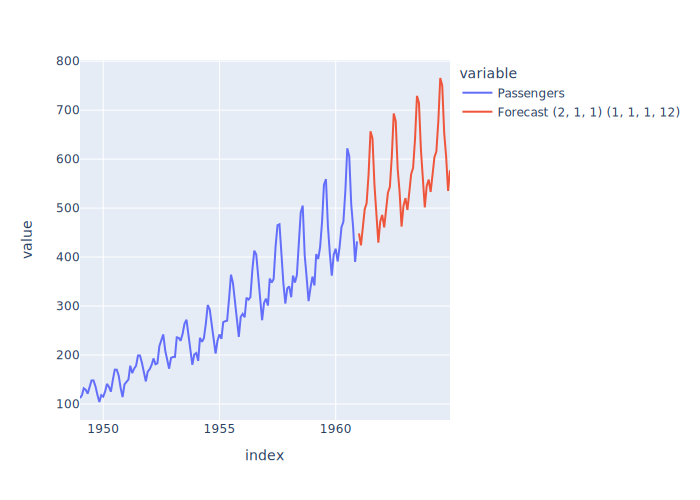

#### Grid Search

[(1, 0, 1),
 (1, 0, 2),
 (1, 0, 3),
 (1, 0, 4),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (1, 1, 4),
 (2, 0, 1),
 (2, 0, 2),
 (2, 0, 3),
 (2, 0, 4),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (2, 1, 4),
 (3, 0, 1),
 (3, 0, 2),
 (3, 0, 3),
 (3, 0, 4),
 (3, 1, 1),
 (3, 1, 2),
 (3, 1, 3),
 (3, 1, 4),
 (4, 0, 1),
 (4, 0, 2),
 (4, 0, 3),
 (4, 0, 4),
 (4, 1, 1),
 (4, 1, 2),
 (4, 1, 3),
 (4, 1, 4)]

[(1, 0, 1, 12),
 (1, 0, 2, 12),
 (1, 0, 3, 12),
 (1, 0, 4, 12),
 (1, 1, 1, 12),
 (1, 1, 2, 12),
 (1, 1, 3, 12),
 (1, 1, 4, 12),
 (2, 0, 1, 12),
 (2, 0, 2, 12),
 (2, 0, 3, 12),
 (2, 0, 4, 12),
 (2, 1, 1, 12),
 (2, 1, 2, 12),
 (2, 1, 3, 12),
 (2, 1, 4, 12),
 (3, 0, 1, 12),
 (3, 0, 2, 12),
 (3, 0, 3, 12),
 (3, 0, 4, 12),
 (3, 1, 1, 12),
 (3, 1, 2, 12),
 (3, 1, 3, 12),
 (3, 1, 4, 12),
 (4, 0, 1, 12),
 (4, 0, 2, 12),
 (4, 0, 3, 12),
 (4, 0, 4, 12),
 (4, 1, 1, 12),
 (4, 1, 2, 12),
 (4, 1, 3, 12),
 (4, 1, 4, 12)]

```python
from tqdm import tqdm_notebook

lowest_aic = float('inf')
best_pdq = best_seasonal_pdq = None

models = []

for param in tqdm_notebook(pdq):
    for param_seasonal in tqdm_notebook(seasonal_pdq):
        try:
            model = SARIMAX(series, order=param, seasonal_order=param_seasonal, enforce_stationarity=False, enforce_invertibility=False)
            results = model.fit(maxiter=10_000)
            models.append([model, results.aic, param, param_seasonal])
            if results.aic < lowest_aic:
                lowest_aic = results.aic
                best_pdq, best_seasonal_pdq = param, param_seasonal
        except:
            continue
```

,AIC,order,order_seasonal
0,989.176474,"(1, 0, 1)","(1, 0, 1, 12)"
1,909.473501,"(1, 0, 1)","(1, 0, 2, 12)"
...,...,...,...
1022,32.000000,"(4, 1, 4)","(4, 1, 3, 12)"
1023,620.584467,"(4, 1, 4)","(4, 1, 4, 12)"


,AIC,order,order_seasonal
194,18.0,"(1, 1, 3)","(1, 0, 3, 12)"
550,20.0,"(3, 0, 2)","(1, 1, 3, 12)"
...,...,...,...
390,NaN,"(2, 1, 1)","(1, 1, 3, 12)"
414,NaN,"(2, 1, 1)","(4, 1, 3, 12)"


,AIC,order,order_seasonal
194,18.000000,"(1, 1, 3)","(1, 0, 3, 12)"
550,20.000000,"(3, 0, 2)","(1, 1, 3, 12)"
...,...,...,...
406,7374.579676,"(2, 1, 1)","(3, 1, 3, 12)"
398,7491.867681,"(2, 1, 1)","(2, 1, 3, 12)"


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                         Passengers   No. Observations:                  144
Model:             SARIMAX(1, 1, 3)x(1, 0, 3, 12)   Log Likelihood                -562.676
Date:                            Thu, 30 May 2024   AIC                           1143.351
Time:                                    01:01:54   BIC                           1170.017
Sample:                                01-01-1949   HQIC                          1154.187
                                     - 12-01-1960                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7319      0.152      4.801      0.000       0.433       1.031
ma.L1         -1.0371      0.161     -6.423      0.000      -1.354      -0.721
ma.L2          0.2620      0.154      1.705      0.088      -0.039       0.563
ma.L3         -0.1733      0.123     -1.405      0.160      -0.415       0.069
ar.S.L12       0.9604      0.040     24.303      0.000       0.883       1.038
ma.S.L12      -0.1166      0.136     -0.856      0.392      -0.384       0.150
ma.S.L24       0.1051      0.131      0.803      0.422      -0.151       0.362
ma.S.L36      -0.0092      0.155     -0.059      0.953      -0.312       0.294
sigma2       124.3861     14.676      8.475      0.000      95.621     153.151
===================================================================================
Ljung-Box (L1) (Q):                   0.13   Jarque-Bera (JB):                32.64
Prob(Q):                              0.72   Prob(JB):                         0.00
Heteroskedasticity (H):               4.02   Skew:                             0.21
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.30
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

,Passengers,"Forecast (2, 1, 1) (1, 1, 1, 12)","Forecast (1, 1, 3) (1, 0, 3, 12)"
1949-01-01,112.0,NaN,NaN
1949-02-01,118.0,NaN,NaN
...,...,...,...
1964-11-01,NaN,534.960046,541.659000
1964-12-01,NaN,577.340591,578.918521


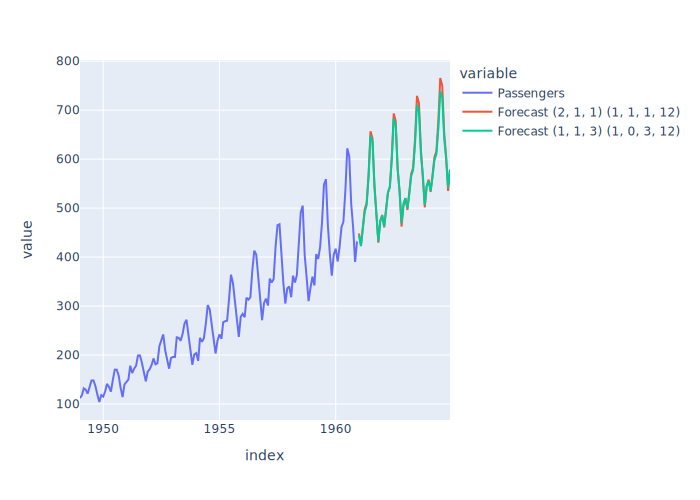